# **1. Perkenalan Dataset**


Pada tahap awal, proyek ini menggunakan dataset yang diperoleh dari public repository Kaggle, yaitu Titanic – Machine Learning from Disaster. Dataset ini dipilih karena bersifat terbuka, memiliki dokumentasi yang lengkap, serta sering digunakan sebagai studi kasus awal dalam pengembangan dan evaluasi model Machine Learning.

Informasi Dataset:
- Nama Dataset: Titanic – Machine Learning from Disaster
- Sumber: Kaggle
- Tautan: https://www.kaggle.com/competitions/titanic
- Jenis Data: Data tabular
- Jumlah Data (train): 891 baris
- Jumlah Fitur: 10 kolom
- Target Variabel: Survived (0 = tidak selamat, 1 = selamat)

Dataset yang digunakan dalam proyek ini berasal dari file train.csv, yang kemudian diubah namanya menjadi titanic.csv untuk keperluan pemrosesan dan konsistensi penamaan dalam proyek. Dataset ini berisi informasi penumpang Titanic seperti usia, jenis kelamin, kelas penumpang, tarif, serta status keselamatan penumpang. Dataset train.csv digunakan sebagai data latih karena telah memiliki label target (Survived) yang memungkinkan proses analisis, pelatihan model, evaluasi performa, serta eksperimen Machine Learning secara end-to-end.

Kelengkapan dokumentasi dataset ini diharapkan dapat membantu audiens memahami konteks data, karakteristik fitur, serta tujuan pemodelan dengan lebih cepat dan akurat.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import os

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [16]:
data = pd.read_csv("../titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

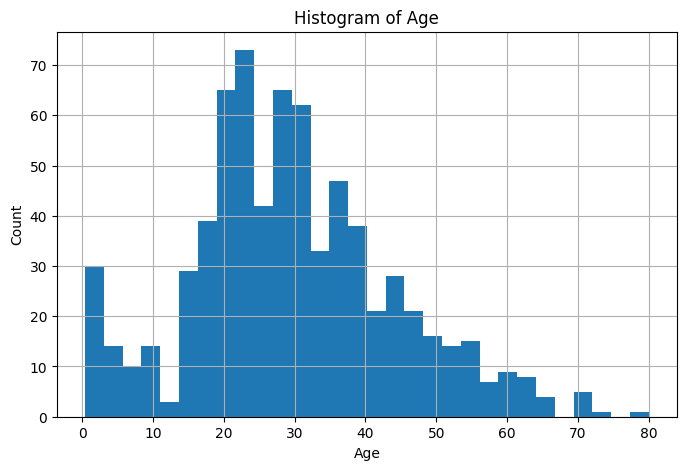

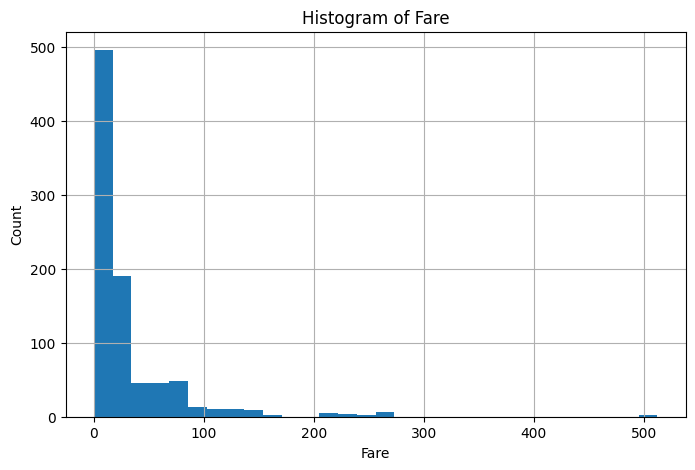

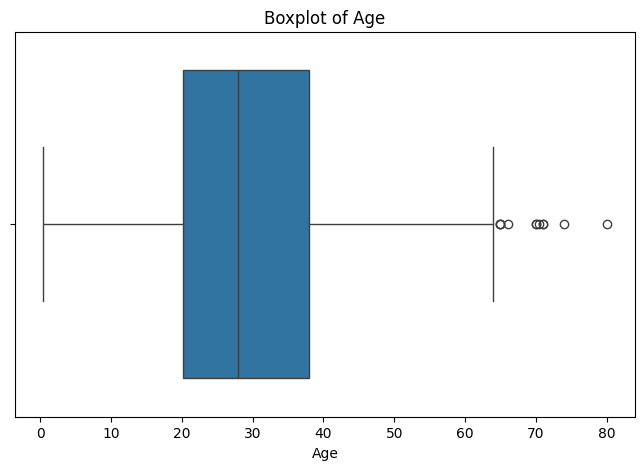

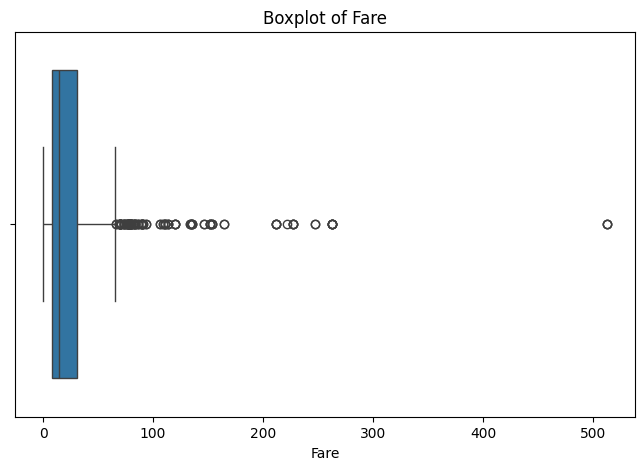

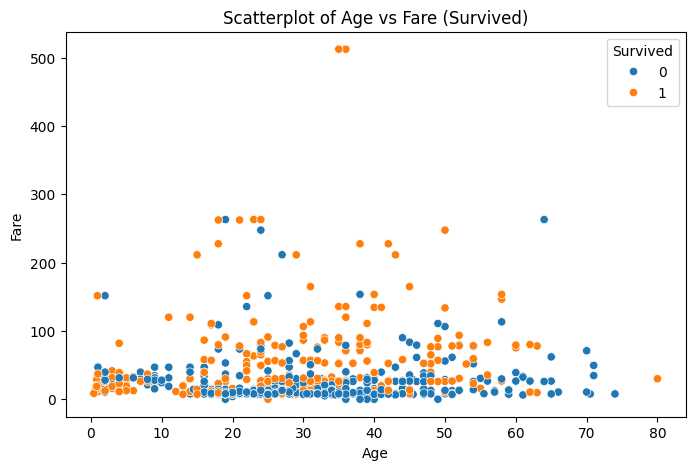

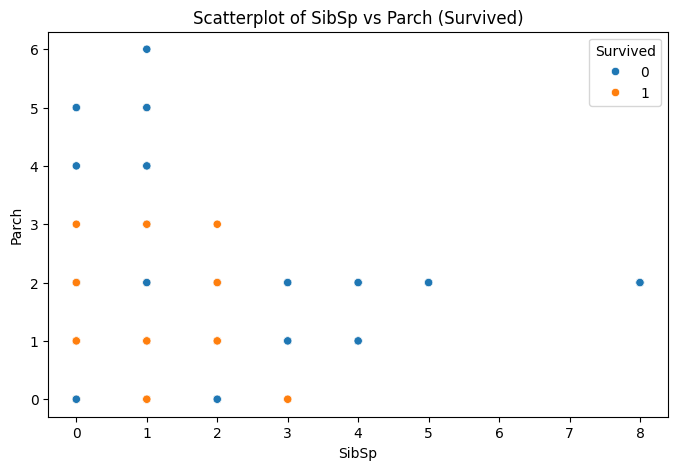

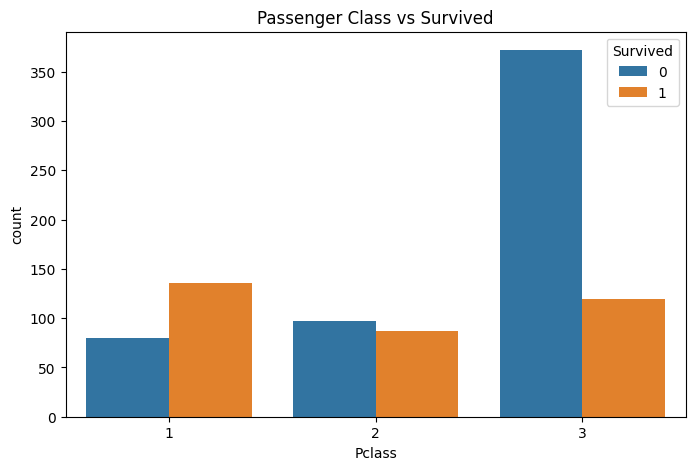

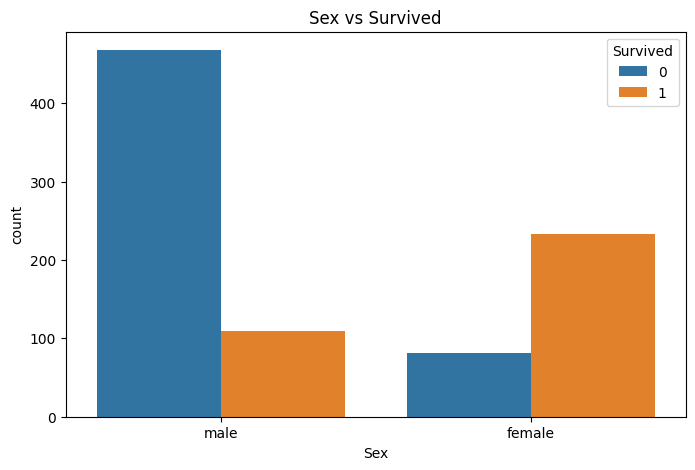

In [17]:
# HISTOGRAM
plt.figure(figsize=(8,5))
data['Age'].hist(bins=30)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8,5))
data['Fare'].hist(bins=30)
plt.title('Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

# BOXPLOT
plt.figure(figsize=(8,5))
sns.boxplot(x=data['Age'])
plt.title('Boxplot of Age')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=data['Fare'])
plt.title('Boxplot of Fare')
plt.show()

# SCATTERPLOT
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['Age'], y=data['Fare'], hue=data['Survived'])
plt.title('Scatterplot of Age vs Fare (Survived)')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x=data['SibSp'], y=data['Parch'], hue=data['Survived'])
plt.title('Scatterplot of SibSp vs Parch (Survived)')
plt.show()

# COUNT PLOT (KATEGORIKAL)
plt.figure(figsize=(8,5))
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Passenger Class vs Survived')
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Sex vs Survived')
plt.show()

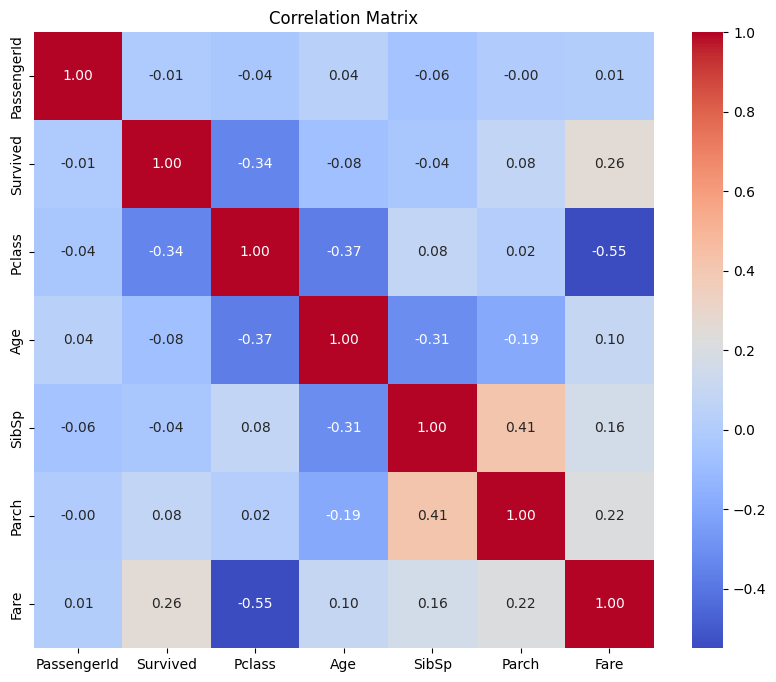

In [18]:
# Matriks Korelasi
numeric_data = data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [19]:
# 1.Menghapus atau Menangani Data Kosong (Missing Values)
data = data.drop(columns=['Cabin', 'Embarked'])

In [20]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [21]:
# 2. Menghapus Data Duplikat
data.duplicated().sum() # untuk mengecek jumlah data duplikat

np.int64(0)

In [22]:
data.drop_duplicates(inplace=True)

In [23]:
#3. Normalisasi atau Standarisasi
# Standarisasi numerik
scaler = StandardScaler()
for col in ['Age', 'Fare', 'SibSp', 'Parch', 'Pclass']:
    data[col + '_scaled'] = scaler.fit_transform(data[[col]])

In [24]:
# 4. Deteksi dan Penanganan Outlier
for col in ['Age', 'Fare']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    data = data[
        (data[col] >= Q1 - 1.5 * IQR) &
        (data[col] <= Q3 + 1.5 * IQR)
    ]

In [25]:
# 5. Encoding Data Kategorikal
label_encoder = LabelEncoder()
data['Sex_encoded'] = label_encoder.fit_transform(data['Sex'])

In [26]:
#6. Feature Engineering dan Seleksi Fitur
X = data.drop(columns=['Survived'])
y = data['Survived']

X = X.select_dtypes(include=["int64", "float64"])

In [27]:
# 7. Pembagian Data Latih dan Data Uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# 8. Simpan dataset hasil preprocessing
BASE_DIR = os.path.dirname(os.path.abspath(__file__))
OUTPUT_DIR = os.path.join(BASE_DIR, "processed_data")
os.makedirs(OUTPUT_DIR, exist_ok=True)

X_train.to_csv(os.path.join(OUTPUT_DIR, "X_train.csv"), index=False)
X_test.to_csv(os.path.join(OUTPUT_DIR, "X_test.csv"), index=False)
y_train.to_csv(os.path.join(OUTPUT_DIR, "y_train.csv"), index=False)
y_test.to_csv(os.path.join(OUTPUT_DIR, "y_test.csv"), index=False)